In [75]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from StringIO import StringIO
import itertools

In [55]:
def prettify_ax(ax):
    """
    Nifty function we can use to make our axes more pleasant to look at
    """
    for spine in ax.spines.itervalues():
        spine.set_visible(False)
    ax.set_frameon=True
    ax.patch.set_facecolor('#eeeeef')
    ax.grid('on', color='w', linestyle='-', linewidth=1)
    ax.tick_params(direction='out')
    ax.set_axisbelow(True)
    
def simple_ax(figsize=(6,4), **kwargs):
    """
    Shortcut to make and 'prettify' a simple figure with 1 axis
    """
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, **kwargs)
    prettify_ax(ax)
    return fig, ax

In [92]:
data = StringIO("""CART,C4.5,RIPPER
0.001 0.003 0.01 0.03 0.1, 0.05 0.15 0.25 0.35 0.45,
0.70319 0.7073509 0.7073509 0.6920943 0.6782247,0.7073509 0.7018031 0.7018031 0.6976422 0.6962552,0.7032
13 7 7 3 2,7 10 10 25 34,7
""")

In [136]:
n_params = 5
idx = [("RIPPER", 0)] + list(itertools.product(["CART", "C4.5"], range(n_params)))
index = pd.MultiIndex.from_tuples(idx, names=["Alg", "Param_num"])

In [94]:
df = pd.read_csv(data)
df.index = ['Param', 'Accuracy', 'Sparsity']

In [189]:
split_df = df["RIPPER"]
for label in ["CART", "C4.5"]:
    split_row = df.ix[:, label].apply(lambda x: pd.Series(map(float, x.split())))
    split_row.columns = [label + '_' + str(i) for i in range(len(split_row.T))]
    split_df = pd.concat([split_df, split_row], axis=1)
#split_df.T.index=index
split_df = split_df.T
split_df.index = index
split_df

Param  Accuracy  Sparsity
Alg    Param_num                           
RIPPER 0            NaN  0.703200       7.0
CART   0          0.001  0.703190      13.0
       1          0.003  0.707351       7.0
       2          0.010  0.707351       7.0
       3          0.030  0.692094       3.0
       4          0.100  0.678225       2.0
C4.5   0          0.050  0.707351       7.0
       1          0.150  0.701803      10.0
       2          0.250  0.701803      10.0
       3          0.350  0.697642      25.0
       4          0.450  0.696255      34.0

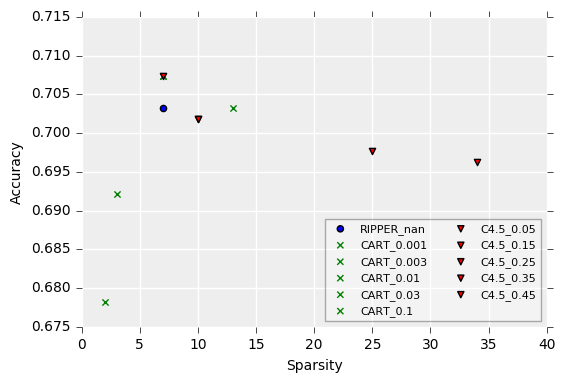

In [191]:
fig, ax = simple_ax()
colors = [0] + [1] * n_params + [2] * n_params
for name, vals in split_df.iterrows():
    if name[0] == "RIPPER":
        c, m = ('b', 'o')
    elif name[0] == "CART":
        c, m = ('g', 'x')
    elif name[0] == "C4.5":
        c, m = ('r', 'v')
    readable = name[0] + '_' + str(vals['Param'])
    ax.scatter(vals['Sparsity'], vals['Accuracy'], c=c, marker=m, label=readable)
plt.ylabel('Accuracy')
plt.xlabel('Sparsity')
plt.legend(ncol=2, scatterpoints=1, loc='lower right', fontsize=8, framealpha=0.3)
plt.show()

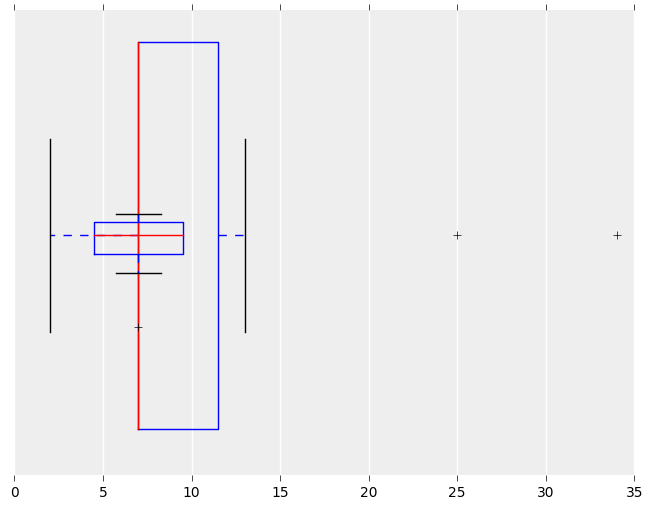

In [254]:
fig, ax = simple_ax(figsize=(8,6))
#ax.scatter(split_df['Sparsity'], split_df['Accuracy'])
ax.boxplot(split_df['Sparsity'],vert=False, widths=0.1, manage_xticks=False, positions=[split_df['Accuracy'].median()])
ax.boxplot(split_df['Accuracy'], widths=5, manage_xticks=False, positions=[split_df['Sparsity'].median()])
ax.set_xticks(np.arange(0, 40, 5))
ax.set_yticks(np.arange(0.6, 1, 5))
plt.show()